# Homework 1

For this homework, we are going to work with [Seoul Bike Sharing Demand dataset](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) from UCI. 

**The homework is due Sunday, October 9 midnight.**

# Task 1

First, download the dataset. 
Read the dataset using ***pandas.read_csv*** function and make preliminary analysis on dataframe.
Our aim in this homework is to *predict Rented Bike count*. 
You can generate your own inputs using the given features if you want. 
After making analysis, split your data into ***Train*** and ***Test sets***.

# Task 2

Apply a ***Linear Regression*** model. First, try to construct your model without scaling your data. Then, construct another model with scaled inputs. Calculate performance evaluation metrics ***(RMSE, MSE, R-squared)*** for each model.

# Task 3

Explain the calculated evaluation metrics and compare your results model you trained in previous task.
If you have any suggestions for alternative methods to improve model performance, explain them.

# Notes

**1.** You must document each step of your tasks: what are you doing, why are you doing it, what problems you encountered and how you solved it. All of these must be explained and documented. **Solutions without sufficient documentations will be penalized accordingly. 50% of your points will come from your code, while the other 50% will come from your explanations.**

**2.** You can use MS Excel to inspect the files, but loading them up to python using pandas and inspecting them there under jupyter is easier.

**3.** In Task 2, you must split your data into a train and test set, and then evaluate the performance of your model on the test set.

**4.**  **Jupyter:** https://jupyter.org/   ,  **Google Colab:** https://colab.research.google.com/  ,  **Anaconda:** https://www.anaconda.com/products/distribution


# Homework 1 Answers

## Task 1

In [130]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Reading data, first lines of dataframe checked

In [96]:
bikes=pd.read_csv("SeoulBikeData.csv")
bikes.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [97]:
bikes.shape

(8760, 14)

In [98]:
bikes.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

Some columns have obscure symbols, these columns have been renamed.

In [99]:
bikes.rename(columns={'Rented Bike Count':'Count','Temperature(�C)':'Temperature(C)','Dew point temperature(�C)':'Dew point temperature(C)'},inplace=True)
col_names=bikes.columns
col_names

Index(['Date', 'Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [100]:
bikes.describe()

,Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Numerical variables and categorical variables are detected.

In [101]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Count                     8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

Since the date column is in string format, it has been converted to date format. Month and day information was taken from the dates. After these operations, the date column was removed from the data.

In [102]:
bikes['Date']=pd.to_datetime(bikes["Date"])


In [103]:

bikes['Month'] = bikes['Date'].dt.month
bikes['Day'] = bikes['Date'].dt.month
bikes.drop('Date', axis=1, inplace = True)

In [104]:
bikes.head()

,Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,1


The data was checked for NA value. There is no NA value in the data. Also, whether there is duplicate rows in data is checked.

In [105]:
bikes.isnull().sum() 

Count                       0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
Month                       0
Day                         0
dtype: int64

In [106]:
bikes.loc[bikes.duplicated()]

,Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day


Categorical columns were assigned to a separate variable for analysis. While this operation was done, comprehension was used. Even though the added columns are in number format, they are categorical variables. 

In [107]:
# Also hour is a categorical variable
categoric= [i for i in bikes.columns if bikes[i].dtype=='object']
categoric.append("Hour")
categoric.append("Month")
categoric.append("Day")

categoric

['Seasons', 'Holiday', 'Functioning Day', 'Hour', 'Month', 'Day']

In [108]:
bikes[categoric]

,Seasons,Holiday,Functioning Day,Hour,Month,Day
0,Winter,No Holiday,Yes,0,1,1
1,Winter,No Holiday,Yes,1,1,1
2,Winter,No Holiday,Yes,2,1,1
3,Winter,No Holiday,Yes,3,1,1
4,Winter,No Holiday,Yes,4,1,1
...,...,...,...,...,...,...
8755,Autumn,No Holiday,Yes,19,11,11
8756,Autumn,No Holiday,Yes,20,11,11
8757,Autumn,No Holiday,Yes,21,11,11
8758,Autumn,No Holiday,Yes,22,11,11


distinct numbers of categorical variables is printed.

In [109]:
for i in categoric: 
    
    print(bikes[i].value_counts())

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Yes    8465
No      295
Name: Functioning Day, dtype: int64
0     365
8     365
15    365
7     365
22    365
14    365
6     365
21    365
13    365
5     365
20    365
12    365
4     365
19    365
11    365
3     365
18    365
10    365
2     365
17    365
9     365
1     365
16    365
23    365
Name: Hour, dtype: int64
8     744
1     744
10    744
3     744
12    744
5     744
7     744
9     720
11    720
4     720
6     720
2     672
Name: Month, dtype: int64
8     744
1     744
10    744
3     744
12    744
5     744
7     744
9     720
11    720
4     720
6     720
2     672
Name: Day, dtype: int64


With the One Hot Encoding process, 1 and 0 numbers were assigned to categorical data. A function has been written for this operation.

The get dummies function is used inside the function. If there are k values for any categorical variable, k-1 columns are sufficient for labeling. For this reason, drop_first was used. The name of the variable is printed in the columns with the prefix command.

The newly formed columns are added to the dataframe with the concat function.

Categoric variables placed in the for loop to simplify the code


In [110]:
def one_hot_encoding(a,df):
    temp = pd.get_dummies(df[a], drop_first = True,prefix=[a])
    df = pd.concat([df, temp], axis = 1)
    df.drop([i], axis = 1, inplace = True)
    return df


for i in categoric:
    bikes=one_hot_encoding(i,bikes)


In [111]:
bikes.columns

Index(['Count', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       '['Seasons']_Spring', '['Seasons']_Summer', '['Seasons']_Winter',
       '['Holiday']_No Holiday', '['Functioning Day']_Yes', '['Hour']_1',
       '['Hour']_2', '['Hour']_3', '['Hour']_4', '['Hour']_5', '['Hour']_6',
       '['Hour']_7', '['Hour']_8', '['Hour']_9', '['Hour']_10', '['Hour']_11',
       '['Hour']_12', '['Hour']_13', '['Hour']_14', '['Hour']_15',
       '['Hour']_16', '['Hour']_17', '['Hour']_18', '['Hour']_19',
       '['Hour']_20', '['Hour']_21', '['Hour']_22', '['Hour']_23',
       '['Month']_2', '['Month']_3', '['Month']_4', '['Month']_5',
       '['Month']_6', '['Month']_7', '['Month']_8', '['Month']_9',
       '['Month']_10', '['Month']_11', '['Month']_12', '['Day']_2',
       '['Day']_3', '['Day']_4', '['Day']_5', '['Day']_6', '['Day']_7',
       '['Day']_8', '['Day']_9'

After these operations, the number of columns increased to 59.

In [112]:
bikes.shape

(8760, 59)

In [113]:
bikes.head()

,Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),['Seasons']_Spring,...,['Day']_3,['Day']_4,['Day']_5,['Day']_6,['Day']_7,['Day']_8,['Day']_9,['Day']_10,['Day']_11,['Day']_12
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


The distribution of the data was analyzed with box plot and scatter plot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


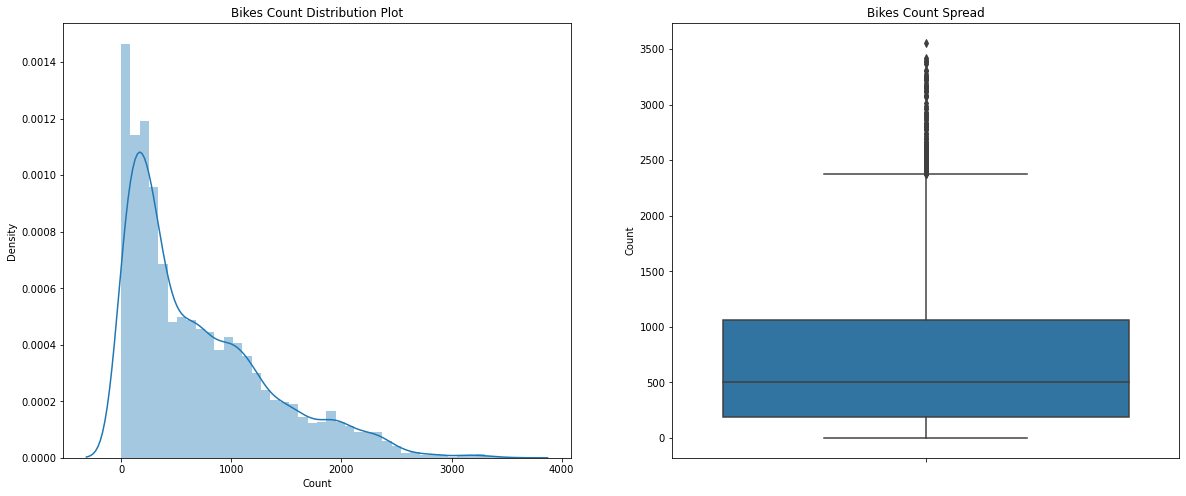

In [114]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Bikes Count Distribution Plot')
sbn.distplot(bikes["Count"])

plt.subplot(1,2,2)
plt.title('Bikes Count Spread')
sbn.boxplot(y=bikes["Count"])

plt.show()

BURAYA BİR HEAT MAP EKLENEBİLİR. VERİLERİN BİRBİRLERİYLE OLAN KORELASYONUNU GÖRMEK İÇİN.

The variable that most affects the count variable is the temperature variable.

In [115]:
bikes.corr()["Count"].sort_values()

['Seasons']_Winter         -0.424925
Humidity(%)                -0.199780
['Hour']_4                 -0.184930
['Hour']_5                 -0.182831
['Hour']_3                 -0.162060
Snowfall (cm)              -0.141804
['Day']_2                  -0.139251
['Month']_2                -0.139251
['Day']_12                 -0.134885
['Month']_12               -0.134885
['Hour']_6                 -0.134827
['Hour']_2                 -0.130280
Rainfall(mm)               -0.123074
['Hour']_1                 -0.090012
['Hour']_10                -0.057153
['Month']_3                -0.043926
['Day']_3                  -0.043926
['Hour']_11                -0.033542
['Hour']_7                 -0.031876
['Hour']_9                 -0.018951
['Hour']_23                -0.010823
['Month']_11               -0.008958
['Day']_11                 -0.008958
['Month']_9                -0.005147
['Day']_9                  -0.005147
['Hour']_12                -0.001669
['Hour']_13                 0.009261
[

İlişkisi en fazla olan iki sütun çizdirildi.

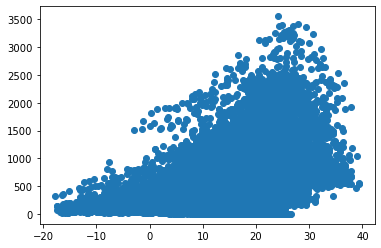

In [116]:
plt.scatter(bikes["Temperature(C)"],bikes["Count"])

## Task 2

The column to be estimated is the number of bikes sold. It is necessary to divide the data for dependent and independent variables.

Dependent Variable --> "Count"

Independent Variables --> Other columns



In [117]:
x=bikes.drop(["Count"],axis=1)
y=bikes["Count"]

In order for the model to learn, the data was divided into two as train and test. 70% train data was determined as 30% test data.

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [119]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape, 

((6132, 58), (2628, 58), (6132,), (2628,))

The regression model was established and fitting linear model.

In [120]:
lm = LinearRegression()

In [121]:
lm.fit(x_train,y_train)

LinearRegression()

The coefficients of the variables were determined.

In [94]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1)

In [123]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 1.50334449e+01 -8.98342779e+00  7.84489940e+00  2.56874996e-02
  1.01408087e+01  7.22882628e+01 -5.78508588e+01  3.47098527e+01
 -1.65802042e+02 -1.81004969e+02 -3.36116837e+02  1.08016660e+02
  9.27569865e+02 -8.02557050e+01 -1.87014367e+02 -2.80762692e+02
 -3.50496226e+02 -3.30399555e+02 -1.78452519e+02  1.28307018e+02
  4.90862867e+02  2.22659278e+01 -2.10770114e+02 -2.35515434e+02
 -1.84639198e+02 -2.01058416e+02 -1.68296988e+02 -9.56949084e+01
  2.07124916e+01  2.99127710e+02  7.52432922e+02  5.15653370e+02
  4.43982018e+02  4.40184403e+02  3.38730801e+02  1.13077987e+02
 -3.53698406e+01 -9.29319856e+00  8.42397531e+00  5.74676200e+01
  1.13627170e+02 -2.36866090e+01 -2.58091063e+01 -4.93659334e+00
  4.34010531e+01 -9.63244305e+00  2.78176873e+01 -3.53698406e+01
 -9.29319856e+00  8.42397531e+00  5.74676200e+01  1.13627170e+02
 -2.36866090e+01 -2.58091063e+01 -4.93659334e+00  4.34010531e+01
 -9.63244305e+00  2.78176873e+01]


Model learned from train data. Then estimated from the test data (x_test) with the independent variables to predict.

In [124]:
y_pred = lm.predict(x_test)

Text(0, 0.5, 'Predicted Y')

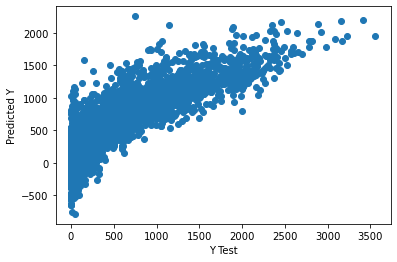

In [125]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Below are the details of the error metrics.

In [126]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 273.6637637998732
MSE: 125285.86503515411
RMSE: 353.95743393119193


In [127]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.6853983597690223

Since we will apply the scale operation to numeric data, the names of the numeric data are taken.

In [128]:
num_vars=bikes.loc[:,'Temperature(C)':'Snowfall (cm)'].columns

num_vars


Index(['Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)'],
      dtype='object')

This process was applied to train and test data to apply to numeric data. (STANDART NE YAPIYOR AÇIKLA!!!!) 

In [132]:
scaler=StandardScaler()

In [133]:
x_train[num_vars]=scaler.fit_transform(x_train[num_vars])
x_test[num_vars]=scaler.transform(x_test[num_vars])

<ipython-input-133-83ef4d1c1224>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[num_vars]=scaler.fit_transform(x_train[num_vars])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-133-83ef4d1c1224>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

After standardizing, the data took values between 0-1.

In [134]:
x_train

,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),['Seasons']_Spring,['Seasons']_Summer,...,['Day']_3,['Day']_4,['Day']_5,['Day']_6,['Day']_7,['Day']_8,['Day']_9,['Day']_10,['Day']_11,['Day']_12
2863,-0.214182,0.592026,-0.624322,-1.589921,0.079757,-0.622404,-0.124435,-0.167113,1,0,...,1,0,0,0,0,0,0,0,0,0
6985,0.524772,0.641180,-1.295895,0.773499,0.746899,-0.668041,-0.124435,-0.167113,0,0,...,0,0,0,0,0,0,1,0,0,0
3060,-0.592057,-1.718204,2.349783,0.902503,-1.361885,1.613844,-0.124435,-0.167113,1,0,...,0,0,0,0,1,0,0,0,0,0
7767,0.692717,-1.669050,-0.240567,0.641188,-0.326663,1.511159,-0.124435,-0.167113,0,0,...,0,0,0,0,0,0,0,1,0,0
5909,1.356097,0.198796,0.335066,0.646149,1.299017,-0.668041,-0.124435,-0.167113,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,0.507978,1.231026,0.239127,-1.632922,0.915602,-0.668041,-0.124435,-0.167113,0,1,...,0,0,0,1,0,0,0,0,0,0
7291,0.340034,-1.128358,1.102577,0.919042,-0.211639,-0.668041,-0.124435,-0.167113,0,0,...,0,0,0,0,0,0,1,0,0,0
1344,-2.363869,-1.177511,-0.048689,0.919042,-2.420111,-0.668041,-0.124435,0.928393,0,0,...,0,0,0,0,0,0,0,0,0,0
7293,0.180487,-0.882589,1.198516,0.919042,-0.196302,-0.668041,-0.124435,-0.167113,0,0,...,0,0,0,0,0,0,1,0,0,0


In [135]:
lm2=LinearRegression()

In [136]:
lm2.fit(x_train,y_train)

LinearRegression()

In [137]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1)

In [138]:
y_pred2 = lm2.predict(x_test)

Text(0, 0.5, 'Predicted Y')

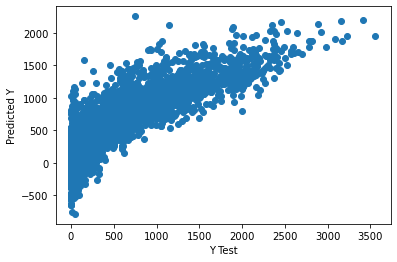

In [139]:
plt.scatter(y_test,y_pred2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [140]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 273.6648389313099
MSE: 125286.34134422839
RMSE: 353.9581067643859


In [142]:
r2_score(y_test, y_pred2)

0.6853971637233552

## Task 3